
# Section 1 統計指標實作範例
## 常見於迴歸問題的評估指標
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

In [1]:
import numpy as np
import matplotlib.pyplot as plt

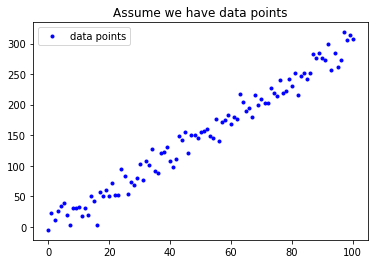

In [2]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

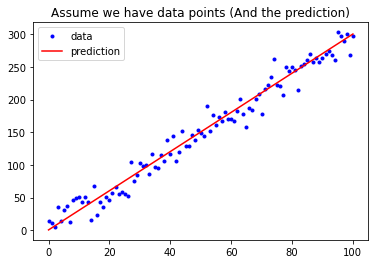

In [ ]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [ ]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

MAE = mean_absolute_error(y, y_hat)
print("The Mean absolute error is %.3f" % (MAE))

The Mean absolute error is 11.846


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

===========================================================================================

===========================================================================================

# Section 2
### 讀取資料
首先，我們用 pandas 讀取最主要的資料 application_train.csv (記得到 https://www.kaggle.com/c/home-credit-default-risk/data 下載)

Note: `data/application_train.csv` 表示 `application_train.csv` 與該 `.ipynb` 的資料夾結構關係如下
```
data
    /application_train.csv
20201021.ipynb
```

In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 設定 data_path
dir_data = '/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/110-2/20220421 機器學習實作2 資料清理數據前處理/data'

#### 用 pd.read_csv 來讀取資料

In [6]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)

Path of read in data: /content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/110-2/20220421 機器學習實作2 資料清理數據前處理/data/application_train.csv


#### Note: 在 jupyter notebook 中，可以使用 `?` 來調查函數的定義

In [7]:
# for example
?pd.read_csv

#### 接下來我們可以用 .head() 這個函數來觀察前 5 row 資料

In [8]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 練習時間
資料的操作有很多，未來會介紹常被使用到的操作，大家不妨先自行想像一下，第一次看到資料，我們一般會想知道什麼訊息？

#### Ex: 如何知道資料的 row 數以及 column 數、有什麼欄位、多少欄位、如何截取部分的資料等等

有了對資料的好奇之後，我們又怎麼通過程式碼來達成我們的目的呢？

#### 可參考該[基礎教材](https://bookdata.readthedocs.io/en/latest/base/01_pandas.html#DataFrame-%E5%85%A5%E9%97%A8)或自行 google

### e.g.
#### 資料的 row 數以及 column 數

#### 列出所有欄位

#### 截取部分資料 pd.iloc[]

===========================================================================================

===========================================================================================

===========================================================================================

# Section 3
### 自己建立 datafreme

In [9]:
import pandas as pd

### 方法一

In [10]:
data = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitor': [139, 237, 326, 456]}

In [11]:
visitors_1 = pd.DataFrame(data)
visitors_1

,weekday,city,visitor
0,Sun,Austin,139
1,Sun,Dallas,237
2,Mon,Austin,326
3,Mon,Dallas,456


## 使用內建功能讀取 txt 檔

In [13]:
with open("/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/110-2/20220421 機器學習實作2 資料清理數據前處理/data/examples/example.txt", 'r') as f:
    data = f.readlines()
print(data)

['id,sex,age,score\n', '001,F,20,77\n', '002,F,25,90\n', '003,M,22,80\n', '004,F,30,66\n', '005,M,40,60\n', '006,M,29,87']


## 將 txt 轉成 pandas dataframe

In [25]:
import pandas as pd

data = []
with open("/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/110-2/20220421 機器學習實作2 資料清理數據前處理/data/examples/example.txt", 'r') as f:
    for line in f:
        line = line.replace('\n', '').split(',') # 將每句最後的 \n 取代成空值後，再以逗號斷句
        data.append(line)
data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

In [21]:
df = pd.DataFrame(data[1:])
df.columns = data[0]
df

,id,sex,age,score
0,001,F,20,77
1,002,F,25,90
2,003,M,22,80
3,004,F,30,66
4,005,M,40,60
5,006,M,29,87


## 將資料轉成 json 檔後輸出
將 json 讀回來後，是否與我們原本想要存入的方式一樣? (以 id 為 key)

In [17]:
import json
df.to_json('/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/111-1/20221109 機器學習實作2 資料清理數據前處理/data/examples/example01.json')

In [18]:
# 上面的存入方式，會將 column name 做為主要的 key, row name 做為次要的 key
with open('/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/111-1/20221109 機器學習實作2 資料清理數據前處理/data/examples/example01.json', 'r') as f:
    j1 = json.load(f)
j1

{'id': {'0': '001',
  '1': '002',
  '2': '003',
  '3': '004',
  '4': '005',
  '5': '006'},
 'sex': {'0': 'F', '1': 'F', '2': 'M', '3': 'F', '4': 'M', '5': 'M'},
 'age': {'0': '20', '1': '25', '2': '22', '3': '30', '4': '40', '5': '29'},
 'score': {'0': '77', '1': '90', '2': '80', '3': '66', '4': '60', '5': '87'}}

In [22]:
df.set_index('id', inplace=True)
df

,sex,age,score
id,,,
001,F,20,77
002,F,25,90
003,M,22,80
004,F,30,66
005,M,40,60
006,M,29,87


In [23]:
df.to_json('/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/111-1/20221109 機器學習實作2 資料清理數據前處理/data/examples/example02.json', orient='index')

In [24]:
with open('/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/111-1/20221109 機器學習實作2 資料清理數據前處理/data/examples/example02.json', 'r') as f:
    j2 = json.load(f)
j2

{'001': {'sex': 'F', 'age': '20', 'score': '77'},
 '002': {'sex': 'F', 'age': '25', 'score': '90'},
 '003': {'sex': 'M', 'age': '22', 'score': '80'},
 '004': {'sex': 'F', 'age': '30', 'score': '66'},
 '005': {'sex': 'M', 'age': '40', 'score': '60'},
 '006': {'sex': 'M', 'age': '29', 'score': '87'}}

## 將檔案存為 npy 檔
一個專門儲存 numpy array 的檔案格式
使用 npy 通常可以讓你更快讀取資料喔!  
[建議閱讀](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)

In [26]:
import numpy as np
# 將 data 的數值部分轉成 numpy array
array = np.array(data[1:])
array

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

In [27]:
np.save(arr=array, file='/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/111-1/20221109 機器學習實作2 資料清理數據前處理/data/examples/example.npy')

In [28]:
array_back = np.load('/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/111-1/20221109 機器學習實作2 資料清理數據前處理/data/examples/example.npy')
array_back

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

## Pickle
存成 pickle 檔  
什麼都包，什麼都不奇怪的 [Pickle](https://docs.python.org/3/library/pickle.html)  
比如說 [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) 的資料集就是用 pickle 包的喔!

In [29]:
import pickle
with open('/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/111-1/20221109 機器學習實作2 資料清理數據前處理/data/examples/example.pkl', 'wb') as f:
    pickle.dump(file=f, obj=data)

In [30]:
with open('/content/drive/MyDrive/中大講師/中大講師/中大 - 天氣與人工智慧/111-1/20221109 機器學習實作2 資料清理數據前處理/data/examples/example.pkl', 'rb') as f:
    pkl_data = pickle.load(f)
pkl_data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

### 方法二

In [31]:
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
visitors = [139, 237, 326, 456]

list_labels = ['city', 'weekday', 'visitor']
list_cols = [cities, weekdays, visitors]

zipped = list(zip(list_labels, list_cols))

In [32]:
zipped

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']),
 ('weekday', ['Sun', 'Sun', 'Mon', 'Mon']),
 ('visitor', [139, 237, 326, 456])]

In [33]:
visitors_2 = pd.DataFrame(dict(zipped))
visitors_2

,city,weekday,visitor
0,Austin,Sun,139
1,Dallas,Sun,237
2,Austin,Mon,326
3,Dallas,Mon,456


## 一個簡單例子
假設你想知道如果利用 pandas 計算上述資料中，每個 weekday 的平均 visitor 數量，

通過 google 你找到了 https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas

想要測試的時候就可以用 visitors_1 這個只有 4 筆資料的資料集來測試程式碼

In [34]:
visitors_1.groupby(by="weekday")['visitor'].mean()

weekday
Mon    391.0
Sun    188.0
Name: visitor, dtype: float64

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 生成一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)




<img src="./hw3-1.png">

===========================================================================================

===========================================================================================

===========================================================================================

===========================================================================================

===========================================================================================

## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

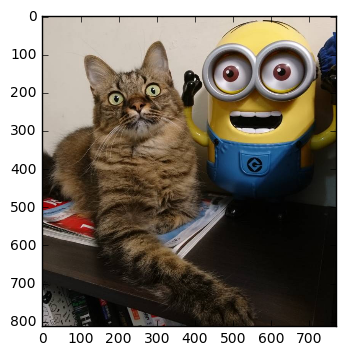

In [ ]:
import skimage.io as skio
img1 = skio.imread('data/examples/example.jpg')
plt.imshow(img1)
plt.show()

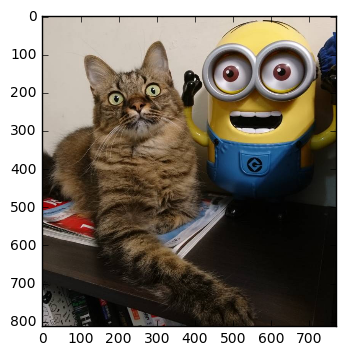

In [ ]:
from PIL import Image
img2 = Image.open('data/examples/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

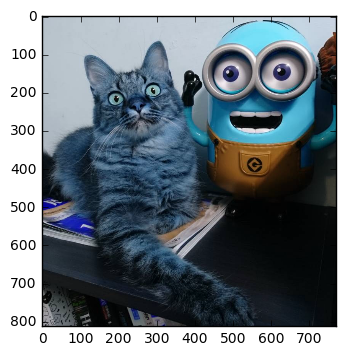

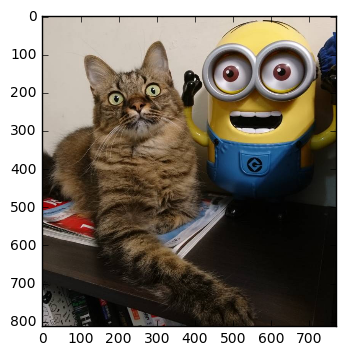

In [ ]:
import cv2
img3 = cv2.imread('data/examples/example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [ ]:
N_times = 1000

In [ ]:
%%timeit
im = np.array([skio.imread('data/examples/example.jpg') for _ in range(N_times)])

1 loop, best of 3: 16.6 s per loop


In [ ]:
%%timeit
im = np.array([np.array(Image.open('data/examples/example.jpg')) for _ in range(N_times)])

1 loop, best of 3: 17.1 s per loop


In [ ]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('data/examples/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

1 loop, best of 3: 16.5 s per loop


## 將影像存成 mat

In [ ]:
import scipy.io as sio
sio.savemat(file_name='data/examples/example.mat', mdict={'img': img1})

In [ ]:
mat_arr = sio.loadmat('data/examples/example.mat')
print(mat_arr.keys())

dict_keys(['__version__', 'img', '__globals__', '__header__'])


In [ ]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(813, 771, 3)


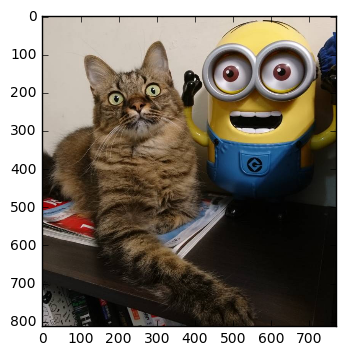

In [ ]:
plt.imshow(mat_arr)
plt.show()

# 練習時間

## 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 1-2 將所提供的 txt 轉成 pandas dataframe

## 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [ ]:
import pandas as pd
import requests
data = []
data = requests.get('https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt')
for i in data.content:
    print(i)

#    for line in f:
#       line = line.replace('\n', '').split(',') # 將每句最後的 /n 取代成空值後，再以逗號斷句
  #      data.append(line)

串流輸出內容已截斷至最後 5000 行。
48
49
53
51
56
56
95
50
53
49
48
57
9
104
116
116
112
58
47
47
102
97
114
109
52
46
115
116
97
116
105
99
46
102
108
105
99
107
114
46
99
111
109
47
51
48
54
55
47
50
52
56
55
50
57
49
57
56
53
95
102
101
50
51
55
98
100
101
50
48
46
106
112
103
10
110
48
48
48
49
53
51
56
56
95
50
53
49
51
51
9
104
116
116
112
58
47
47
102
97
114
109
52
46
115
116
97
116
105
99
46
102
108
105
99
107
114
46
99
111
109
47
51
49
53
57
47
50
53
53
54
57
51
57
55
50
48
95
52
97
97
57
54
52
102
56
52
97
46
106
112
103
10
110
48
48
48
49
53
51
56
56
95
50
53
49
52
50
9
104
116
116
112
58
47
47
102
97
114
109
52
46
115
116
97
116
105
99
46
102
108
105
99
107
114
46
99
111
109
47
51
50
48
56
47
50
50
56
57
49
49
48
50
55
48
95
49
98
48
100
52
52
99
50
52
51
46
106
112
103
10
110
48
48
48
49
53
51
56
56
95
50
53
49
52
51
9
104
116
116
112
58
47
47
102
97
114
109
52
46
115
116
97
116
105
99
46
102
108
105
99
107
114
46
99
111
109
47
51
53
57
48
47
51
51
57
57
56
54
51
57
53
51
95
53
98
55
99

KeyboardInterrupt: ignored